In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [11]:
# Answer(a)
df = pd.read_csv('/Users/sonu/Documents/aiml/assignments/c3/3/liver_disease_.csv')
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


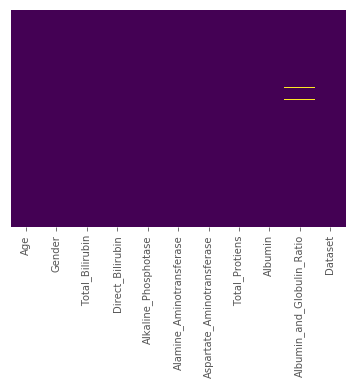

In [12]:
import seaborn as sns

# Answer (b) : Cleaning data
df.count()
# Find missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

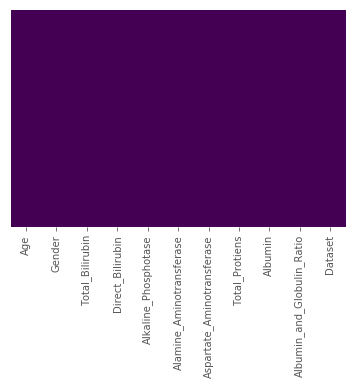

In [13]:
# Answer (b) : Cleaning data

# replacing missing values with mean, since there are no evident outliers that could bias the model
agr_mean = df['Albumin_and_Globulin_Ratio'].mean()
df['Albumin_and_Globulin_Ratio'].fillna(agr_mean, inplace=True)

# It turns out that content in 'Gender' column has trailing/leading space
# that caused Failure in replace function. 
# So strip the space.
df['Gender'] = df['Gender'].str.strip()
# replace categorical feautures with numerical labels as KNN wont work with non numerical data
df['Gender'] = df['Gender'].replace({"Male":1})
df['Gender'] = df['Gender'].replace({"Female":0})

# Chnage target variable
df['Dataset'] = df['Dataset'].str.strip()
# replace categorical feautures with numerical labels as classifier wont work with non numerical data
df['Dataset'] = df['Dataset'].replace({"Yes":1})
df['Dataset'] = df['Dataset'].replace({"No":0})

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
# Separate the data into variables and result
X = df.drop('Dataset', axis=1).values
y = df['Dataset'].values

numf = X.size/y.size
print("Num Features :", numf)

Num Features : 10.0


In [20]:
# Answer (d) :  Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42, stratify=y)

In [21]:
# Answer (e)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
# Predictions
predictions = logmodel.predict(X_test)

In [30]:
# Answer (f) : Model accuracy
# Model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))
print("Accuracy = ", (18 + 153)/ 234)
print("Error Rate = ", (49 + 14) / 234)

print("\nReport: ")
print(classification_report(y_test, predictions))

[[ 18  49]
 [ 14 153]]
Accuracy =  0.7307692307692307
Error Rate =  0.2692307692307692

Report: 
              precision    recall  f1-score   support

           0       0.56      0.27      0.36        67
           1       0.76      0.92      0.83       167

   micro avg       0.73      0.73      0.73       234
   macro avg       0.66      0.59      0.60       234
weighted avg       0.70      0.73      0.70       234



In [31]:
# Answer (f) : AUC curve
y_test_pred_prob = logmodel.predict_proba(X_test)

0.7588703190633658


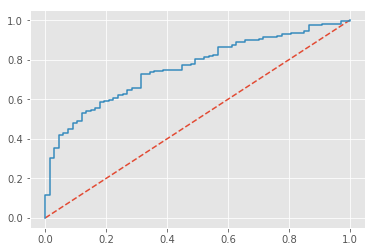

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob[:,1], pos_label=True)

plt.plot([0,1],[0,1],"--")
plt.plot(fpr, tpr)
print(roc_auc_score(y_test, y_test_pred_prob[:,1]))

In [45]:
# Answer (g) :  Regularization 
from sklearn.model_selection import GridSearchCV
c_values = list(np.arange(1,50))

param_grid = [
    {
        'C': c_values,
        'penalty' : ["l1"],
        'solver'  : ['liblinear'],
        'multi_class' : ['ovr'],
        'random_state' : [42]
     },
    {
        'C': c_values,
        'penalty' : ["l2"],
        'solver'  : ['liblinear', 'newton-cg', 'lbfgs'],
        'multi_class' : ['ovr'],
        'random_state' : [42] 
    }
]

grid = GridSearchCV(LogisticRegression(), param_grid, scoring='f1')
grid.fit(X,y)


/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: C

/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/sonu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'penalty': ['l1'], 'solver': ['liblinear'], 'multi_class': ['ovr'], 'random_state': [42]}, {'...'l2'], 'solver': ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class': ['ovr'], 'random_state': [42]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [46]:
print(grid.best_score_)

0.827119611724802


In [47]:
print(grid.best_params_)

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}


In [48]:
logcv = LogisticRegression(C=1,multi_class='ovr',penalty='l1',solver='liblinear', random_state=42)
logcv.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

0.7574403431942086


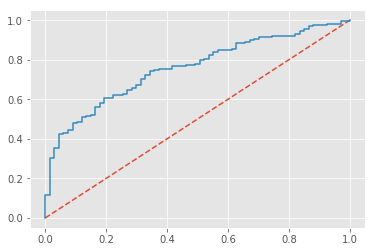

In [52]:
logcv_predict = logcv.predict(X_test)
logcv_predict_proba = logcv.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, logcv_predict_proba[:,1], pos_label=True)

plt.plot([0,1],[0,1],"--")
plt.plot(fpr, tpr)
print(roc_auc_score(y_test, logcv_predict_proba[:,1]))